# Limpieza de datos

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_seq_items', None)

import numpy as np

import re

import pylab as plt
import seaborn as sns

In [2]:
def check_nan(df: pd.DataFrame) -> None:
    
    """
    Recibe un dataframe y enseña el % de nulos y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # % de valores nulos
    
    nan_cols = nan_cols[nan_cols>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    
    # grafico de nulos en el dataframe

    #inicializa la figura
    plt.figure(figsize=(10, 6))  # 100X60  pixeles


    sns.heatmap(df.isna(),       # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',      # mapa de color
                cbar=False           # sin barra lateral
               )

    plt.show();

## Limpieza actor.csv

In [3]:
actor = pd.read_csv(r"..\data\actor.csv")
actor.head(5)

,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


In [4]:
actor.shape

(200, 4)

In [5]:
actor["first_name"] = actor["first_name"].str.lower()
actor["last_name"] = actor["last_name"].str.lower()

In [6]:
actor["first_name"] = actor["first_name"].str.capitalize()
actor["last_name"] = actor["last_name"].str.capitalize()

In [7]:
actor = actor.drop("last_update", axis=1)

In [8]:
actor.head(5)

,actor_id,first_name,last_name
0,1,Penelope,Guiness
1,2,Nick,Wahlberg
2,3,Ed,Chase
3,4,Jennifer,Davis
4,5,Johnny,Lollobrigida


In [125]:
actor['full_name'] = actor['first_name'] + ' ' + actor['last_name']

In [126]:
actor

,actor_id,first_name,last_name,full_name
0,1,Penelope,Guiness,Penelope Guiness
1,2,Nick,Wahlberg,Nick Wahlberg
2,3,Ed,Chase,Ed Chase
3,4,Jennifer,Davis,Jennifer Davis
4,5,Johnny,Lollobrigida,Johnny Lollobrigida
5,6,Bette,Nicholson,Bette Nicholson
6,7,Grace,Mostel,Grace Mostel
7,8,Matthew,Johansson,Matthew Johansson
8,9,Joe,Swank,Joe Swank
9,10,Christian,Gable,Christian Gable


In [10]:
actor.to_csv('../data/actor_clean.csv', index=False)

## Limpieza category.csv

In [11]:
category = pd.read_csv(r"..\data\category.csv")
category.head(5)

,category_id,name,last_update
0,1,Action,2006-02-15 04:46:27
1,2,Animation,2006-02-15 04:46:27
2,3,Children,2006-02-15 04:46:27
3,4,Classics,2006-02-15 04:46:27
4,5,Comedy,2006-02-15 04:46:27


In [12]:
category.shape

(16, 3)

In [13]:
category["name"]

0          Action
1       Animation
2        Children
3        Classics
4          Comedy
5     Documentary
6           Drama
7          Family
8         Foreign
9           Games
10         Horror
11          Music
12            New
13         Sci-Fi
14         Sports
15         Travel
Name: name, dtype: object

In [14]:
category = category.drop("last_update", axis=1)

In [17]:
category.shape

(16, 2)

In [18]:
category.to_csv('../data/category_clean.csv', index=False)

## Limpieza film.csv

In [19]:
film = pd.read_csv(r"..\data\film.csv")
film.head(5)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,NaN,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,NaN,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,NaN,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,NaN,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,NaN,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


'N nan cols: 1'

original_language_id    100.0
dtype: float64

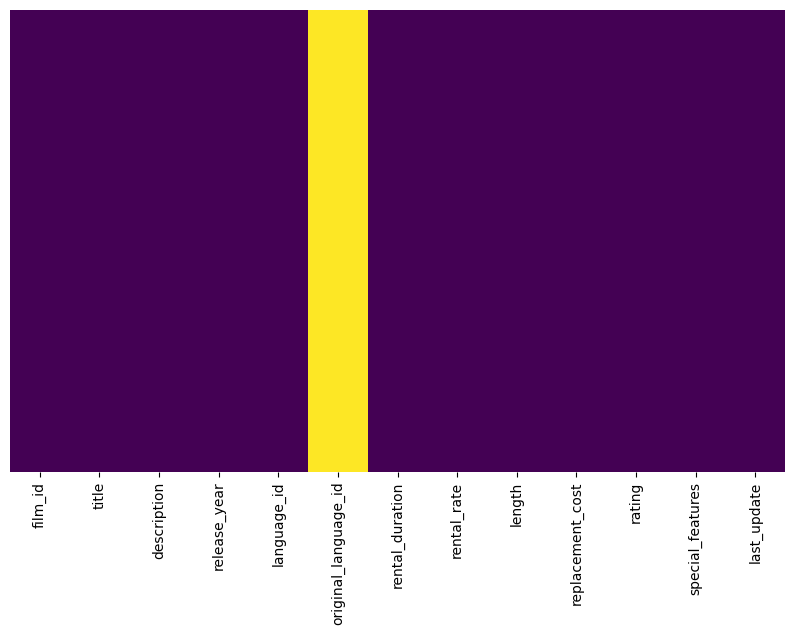

In [20]:
check_nan(film)

In [21]:
film = film.drop("original_language_id", axis=1)
film = film.drop("last_update", axis=1)

In [77]:
film["title"] = film["title"].str.lower()
film["title"] = film["title"].str.capitalize()

In [78]:
film.head(5)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,1,Academy dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,2,Ace goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes"
2,3,Adaptation holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes"
3,4,Affair prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes"
4,5,African egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,Deleted Scenes


In [26]:
film.to_csv('../data/film_clean.csv', index=False)

### Limpieza inventory.csv

In [27]:
inventory = pd.read_csv(r"..\data\inventory.csv")
inventory.head(5)

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17
2,3,1,1,2006-02-15 05:09:17
3,4,1,1,2006-02-15 05:09:17
4,5,1,2,2006-02-15 05:09:17


In [28]:
inventory = inventory.drop("last_update", axis=1)

In [118]:
inventory

,inventory_id,film_id,store_id
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,2
5,6,1,2
6,7,1,2
7,8,1,2
8,9,2,2
9,10,2,2


In [33]:
inventory.to_csv('../data/inventory_clean.csv', index=False)

## Limpieza language.csv

In [34]:
language = pd.read_csv(r"..\data\language.csv")
language.head(5)

,language_id,name,last_update
0,1,English,2006-02-15 05:02:19
1,2,Italian,2006-02-15 05:02:19
2,3,Japanese,2006-02-15 05:02:19
3,4,Mandarin,2006-02-15 05:02:19
4,5,French,2006-02-15 05:02:19


In [35]:
language = language.drop("last_update", axis=1)

In [36]:
language.head(5)

,language_id,name
0,1,English
1,2,Italian
2,3,Japanese
3,4,Mandarin
4,5,French


In [38]:
language.to_csv('../data/language_clean.csv', index=False)

### Limpieza old_HDD.csv

In [108]:
hdd = pd.read_csv(r"..\data\old_HDD.csv")
hdd.head(5)

,first_name,last_name,title,release_year,category_id
0,PENELOPE,GUINESS,ACADEMY DINOSAUR,2006,6
1,PENELOPE,GUINESS,ANACONDA CONFESSIONS,2006,2
2,PENELOPE,GUINESS,ANGELS LIFE,2006,13
3,PENELOPE,GUINESS,BULWORTH COMMANDMENTS,2006,10
4,PENELOPE,GUINESS,CHEAPER CLYDE,2006,14


In [109]:
hdd["first_name"] = hdd["first_name"].str.lower()
hdd["last_name"] = hdd["last_name"].str.lower()
hdd["title"] = hdd["title"].str.lower()

In [110]:
hdd["first_name"] = hdd["first_name"].str.capitalize()
hdd["last_name"] = hdd["last_name"].str.capitalize()
hdd["title"] = hdd["title"].str.capitalize()

In [111]:
hdd = hdd.drop("release_year", axis=1)

In [112]:
hdd.head(5)

,first_name,last_name,title,category_id
0,Penelope,Guiness,Academy dinosaur,6
1,Penelope,Guiness,Anaconda confessions,2
2,Penelope,Guiness,Angels life,13
3,Penelope,Guiness,Bulworth commandments,10
4,Penelope,Guiness,Cheaper clyde,14


In [113]:
hdd.to_csv('../data/old_HDD_clean.csv', index=False)

## Limpieza rental.csv

In [48]:
rental = pd.read_csv(r"..\data\rental.csv")
rental.head(5)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [49]:
rental = rental.drop("last_update", axis=1)

In [52]:
type(["rental_date"])

list

In [53]:
type(rental.loc[0,"rental_date"])

str

In [54]:
# Convertir la columna "rental_date" a tipo datetime
rental['rental_date'] = pd.to_datetime(rental['rental_date'], format='%Y-%m-%d %H:%M:%S')

In [55]:
# Crear una nueva columna para la fecha
rental['rental_date_day'] = rental['rental_date'].dt.date

In [56]:
# Crear una nueva columna para la hora
rental['rental_date_hour'] = rental['rental_date'].dt.time

In [57]:
rental = rental.drop("rental_date", axis=1)

In [58]:
rental.head(5)

,rental_id,inventory_id,customer_id,return_date,staff_id,rental_date_day,rental_date_hour
0,1,367,130,2005-05-26 22:04:30,1,2005-05-24,22:53:30
1,2,1525,459,2005-05-28 19:40:33,1,2005-05-24,22:54:33
2,3,1711,408,2005-06-01 22:12:39,1,2005-05-24,23:03:39
3,4,2452,333,2005-06-03 01:43:41,2,2005-05-24,23:04:41
4,5,2079,222,2005-06-02 04:33:21,1,2005-05-24,23:05:21


In [59]:
# Convertir la columna "rental_date" a tipo datetime
rental['return_date'] = pd.to_datetime(rental['return_date'], format='%Y-%m-%d %H:%M:%S')

In [60]:
rental['return_date_day'] = rental['return_date'].dt.date
rental['return_date_hour'] = rental['return_date'].dt.time
rental = rental.drop("return_date", axis=1)

In [61]:
rental.head(5)

,rental_id,inventory_id,customer_id,staff_id,rental_date_day,rental_date_hour,return_date_day,return_date_hour
0,1,367,130,1,2005-05-24,22:53:30,2005-05-26,22:04:30
1,2,1525,459,1,2005-05-24,22:54:33,2005-05-28,19:40:33
2,3,1711,408,1,2005-05-24,23:03:39,2005-06-01,22:12:39
3,4,2452,333,2,2005-05-24,23:04:41,2005-06-03,01:43:41
4,5,2079,222,1,2005-05-24,23:05:21,2005-06-02,04:33:21


In [62]:
rental.shape

(1000, 8)

In [64]:
rental.to_csv('../data/rental_clean.csv', index=False)

## Visualización

In [82]:
film

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features
0,1,Academy dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes"
1,2,Ace goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes"
2,3,Adaptation holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes"
3,4,Affair prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes"
4,5,African egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,Deleted Scenes
5,6,Agent truman,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,3,2.99,169,17.99,PG,Deleted Scenes
6,7,Airplane sierra,A Touching Saga of a Hunter And a Butler who m...,2006,1,6,4.99,62,28.99,PG-13,"Trailers,Deleted Scenes"
7,8,Airport pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,Trailers
8,9,Alabama devil,A Thoughtful Panorama of a Database Administra...,2006,1,3,2.99,114,21.99,PG-13,"Trailers,Deleted Scenes"
9,10,Aladdin calendar,A Action-Packed Tale of a Man And a Lumberjack...,2006,1,6,4.99,63,24.99,NC-17,"Trailers,Deleted Scenes"


In [83]:
category

,category_id,name
0,1,Action
1,2,Animation
2,3,Children
3,4,Classics
4,5,Comedy
5,6,Documentary
6,7,Drama
7,8,Family
8,9,Foreign
9,10,Games


In [81]:
rental

,rental_id,inventory_id,customer_id,staff_id,rental_date_day,rental_date_hour,return_date_day,return_date_hour
0,1,367,130,1,2005-05-24,22:53:30,2005-05-26,22:04:30
1,2,1525,459,1,2005-05-24,22:54:33,2005-05-28,19:40:33
2,3,1711,408,1,2005-05-24,23:03:39,2005-06-01,22:12:39
3,4,2452,333,2,2005-05-24,23:04:41,2005-06-03,01:43:41
4,5,2079,222,1,2005-05-24,23:05:21,2005-06-02,04:33:21
5,6,2792,549,1,2005-05-24,23:08:07,2005-05-27,01:32:07
6,7,3995,269,2,2005-05-24,23:11:53,2005-05-29,20:34:53
7,8,2346,239,2,2005-05-24,23:31:46,2005-05-27,23:33:46
8,9,2580,126,1,2005-05-25,00:00:40,2005-05-28,00:22:40
9,10,1824,399,2,2005-05-25,00:02:21,2005-05-31,22:44:21


In [73]:
hdd

,first_name,last_name,title,release_year,category_id
0,Penelope,Guiness,Academy dinosaur,2006,6
1,Penelope,Guiness,Anaconda confessions,2006,2
2,Penelope,Guiness,Angels life,2006,13
3,Penelope,Guiness,Bulworth commandments,2006,10
4,Penelope,Guiness,Cheaper clyde,2006,14
5,Penelope,Guiness,Color philadelphia,2006,4
6,Penelope,Guiness,Elephant trojan,2006,11
7,Penelope,Guiness,Gleaming jawbreaker,2006,15
8,Penelope,Guiness,Human graffiti,2006,10
9,Penelope,Guiness,King evolution,2006,8


In [85]:
actor

,actor_id,first_name,last_name
0,1,Penelope,Guiness
1,2,Nick,Wahlberg
2,3,Ed,Chase
3,4,Jennifer,Davis
4,5,Johnny,Lollobrigida
5,6,Bette,Nicholson
6,7,Grace,Mostel
7,8,Matthew,Johansson
8,9,Joe,Swank
9,10,Christian,Gable


In [86]:
inventory

,inventory_id,film_id,store_id
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,2
5,6,1,2
6,7,1,2
7,8,1,2
8,9,2,2
9,10,2,2


In [124]:
hdd

,first_name,last_name,title,category_id
0,Penelope,Guiness,Academy dinosaur,6
1,Penelope,Guiness,Anaconda confessions,2
2,Penelope,Guiness,Angels life,13
3,Penelope,Guiness,Bulworth commandments,10
4,Penelope,Guiness,Cheaper clyde,14
5,Penelope,Guiness,Color philadelphia,4
6,Penelope,Guiness,Elephant trojan,11
7,Penelope,Guiness,Gleaming jawbreaker,15
8,Penelope,Guiness,Human graffiti,10
9,Penelope,Guiness,King evolution,8


# Trabajo tabla old_HDD

Puedo volcar datos de "old_HDD" a los df "actor" y "film" para ahorrarme esta tabla en SQL.

Por un lado, merge de "old_HDD" y "actor" mediante la columna "full_name" que he creado previamente en las dos.

Por otro lado, merge de "old_HDD" y "film" mediante "title" para que "film" se quede con la información de "category_id"

In [129]:
film2 = pd.merge(film, hdd, on='title', how='inner')
film2

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,first_name,last_name,category_id
0,1,Academy dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",Penelope,Guiness,6
1,1,Academy dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",Christian,Gable,6
2,1,Academy dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",Lucille,Tracy,6
3,1,Academy dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",Sandra,Peck,6
4,2,Ace goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",Bob,Fawcett,11
5,3,Adaptation holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",Nick,Wahlberg,6
6,3,Adaptation holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",Bob,Fawcett,6
7,3,Adaptation holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",Cameron,Streep,6
8,6,Agent truman,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,3,2.99,169,17.99,PG,Deleted Scenes,Kirsten,Paltrow,9
9,6,Agent truman,A Intrepid Panorama of a Robot And a Boy who m...,2006,1,3,2.99,169,17.99,PG,Deleted Scenes,Sandra,Kilmer,9
